In [1]:
# Importation des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
gnb = GaussianNB()
RandomForest = RandomForestClassifier()
SGD = SGDClassifier()
SVC = svm.SVC()
DecisionTree = DecisionTreeClassifier()
Models = [GaussianNB, RandomForest, SGD, SVC, DecisionTree]

In [7]:
from copy import deepcopy
def bruit_etiquette_iris(Y, alpha):
    """Cette fonction prend
    - alpha : proportion des exemples à bruiter
    - y : classe
    et retourne la classe bruitée
    """
    y = deepcopy(Y)
    nb_exemples = len(Y) # nombre d'exemples
    n = int(alpha*nb_exemples/100) # nombre des exemples à bruiter avec un pourcentage alpha
    indices = random.sample(range(0,len(Y)), n) # indices de n éléments du dataset aléatoires
    if len(indices)>0:
        for i in indices:
            y[i]= random.randint(0,2) # on affecte à chacun des indices qui ont été générés aléatoirement 
                                        # une étiquette aléatoire également
    return y

In [8]:
# simulation du bruit pour titanic
def bruit_etiquette_titanic(Y, alpha):
    """Cette fonction prend
    - alpha : proportion des exemples à bruiter
    - y : classe
    et retourne la classe bruitée
    """
    y = deepcopy(Y)
    nb_exemples = len(Y) # nombre d'exemples
    n = int(alpha*nb_exemples/100) # nombre des exemples à bruiter avec un pourcentage alpha
    indices = random.sample(range(0,len(Y)), n) # indices de n éléments du dataset aléatoires
    if len(indices)>0:
        for i in indices:
            y[i]= random.randint(0,1) # on affecte à chacun des indices qui ont été générés aléatoirement 
                                        # une étiquette aléatoire également
    return y

In [9]:
# Importation des données Iris
import sklearn.datasets as d
df = d.load_iris()
x = df.data
y = df.target
X_iris, Y_iris = shuffle(x, y)

In [10]:
# Importation des données Titanic
titanic = sns.load_dataset('titanic')
# On garde uniquement les variables suivantes
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
# Suppression des valeurs manquantes
titanic.dropna(axis = 0, inplace = True)
# Conversion de la variable sex 
titanic['sex'].replace(['male', 'female'], [0,1], inplace = True)

In [11]:
# On sépare la target variable
X_titanic = titanic.drop('survived', axis =1).values
Y_titanic = titanic['survived'].values

# DecisionTreeClassifer

On commence d'abord par une simulation du bruit. Nous avons introduit un bruit dans la classe comme suit :
Tout d'abord on mélange les exemples, puis on choisit un pourcentage $\alpha$ des exemples à bruiter, et ensuite on choisit aléatoirement un nombre d'exemples avec ce pourcentage. Finalement on modifie l'étiquette de ces exemples de façon aléatoire. Dans iris, nous avons 3 classes correspondant à 0,1 et 2. Donc pour chaque exemple parmi ceux qui ont été sélectionnés, on affecte à son étiquette 0, 1 ou 2 aléatoirement.

Afin de mesurer la robustesse de l'algorithme en présence du bruit, on prend une liste $\alpha = [\alpha_1, ..., \alpha_m]$ et pour chaque $\alpha_i$ on calcule l'accuracy.  On obtient donc une liste des accuracy correspondant à $\alpha$ et on trace la courbe de cette liste en fonction de $\alpha$.

In [12]:
alpha = list(range(40)) # liste de 0% à 40%

In [13]:
l1_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l1_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l1_iris.append(np.mean(m_iris))
    l1_titanic.append(np.mean(m_titanic))

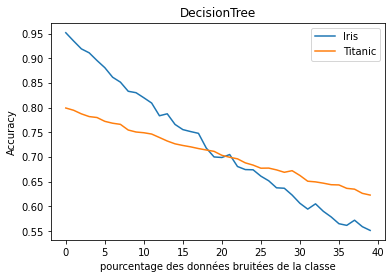

In [14]:
plt.plot(alpha, l1_iris, label = 'Iris')
plt.plot(alpha, l1_titanic, label = 'Titanic')
plt.title("DecisionTree")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

# RandomForestClassifier

In [15]:
l2_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l2_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        rf = RandomForestClassifier()
        rf.fit(x_train, y_train)
        accuracy = rf.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        rf = RandomForestClassifier()
        rf.fit(x_train, y_train)
        accuracy = rf.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l2_iris.append(np.mean(m_iris))
    l2_titanic.append(np.mean(m_titanic))

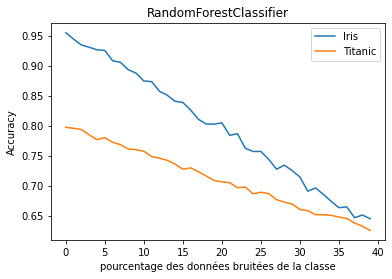

In [16]:
plt.plot(alpha, l2_iris, label = 'Iris')
plt.plot(alpha, l2_titanic, label = 'Titanic')
plt.title("RandomForestClassifier")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

# KnnClassifier

In [17]:
l3_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l3_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        knn = KNeighborsClassifier()
        knn.fit(x_train, y_train)
        accuracy = knn.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        knn = KNeighborsClassifier()
        knn.fit(x_train, y_train)
        accuracy = knn.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l3_iris.append(np.mean(m_iris))
    l3_titanic.append(np.mean(m_titanic))

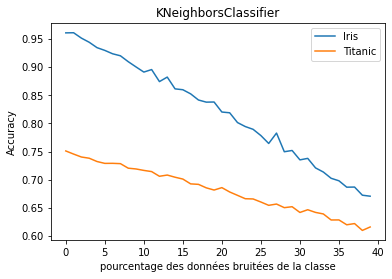

In [18]:
plt.plot(alpha, l3_iris, label = 'Iris')
plt.plot(alpha, l3_titanic, label = 'Titanic')
plt.title("KNeighborsClassifier")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

# GaussianNB

In [19]:
l4_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l4_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        gnb = GaussianNB()
        gnb.fit(x_train, y_train)
        accuracy = gnb.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        gnb = GaussianNB()
        gnb.fit(x_train, y_train)
        accuracy = gnb.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l4_iris.append(np.mean(m_iris))
    l4_titanic.append(np.mean(m_titanic))

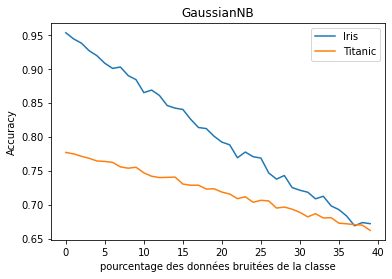

In [20]:
plt.plot(alpha, l4_iris, label = 'Iris')
plt.plot(alpha, l4_titanic, label = 'Titanic')
plt.title("GaussianNB")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

# SVM

In [21]:
from sklearn import svm

In [22]:
l5_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l5_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        clf = svm.SVC()
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        clf = svm.SVC()
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l5_iris.append(np.mean(m_iris))
    l5_titanic.append(np.mean(m_titanic))

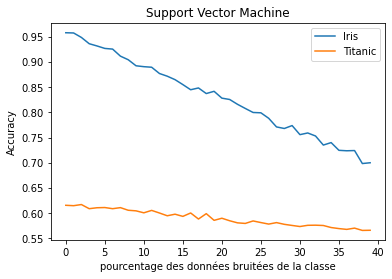

In [23]:
# Courbes pour titanic et iris
plt.plot(alpha, l5_iris, label = 'Iris')
plt.plot(alpha, l5_titanic, label = 'Titanic')
plt.title("Support Vector Machine")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

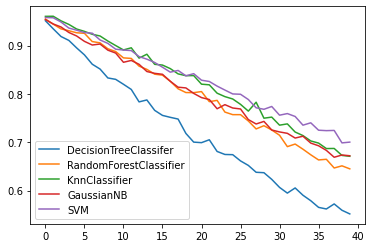

In [24]:
# Courbes pour Iris
accuracy = [l1_iris,l2_iris,l3_iris, l4_iris, l5_iris]
model = ['DecisionTreeClassifer', 'RandomForestClassifier', 'KnnClassifier', 'GaussianNB', 'SVM']
for i in range(len(model)):
    plt.plot(alpha, accuracy[i], label = model[i])
plt.legend()
plt.show()

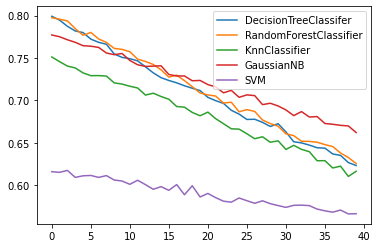

In [25]:
# Courbes pour titanic
accuracy = [l1_titanic,l2_titanic,l3_titanic, l4_titanic, l5_titanic]
model = ['DecisionTreeClassifer', 'RandomForestClassifier', 'KnnClassifier', 'GaussianNB', 'SVM']
for i in range(len(model)):
    plt.plot(alpha, accuracy[i], label = model[i])
plt.legend()
plt.show()

In [26]:
# Variance (on l'appelle ici Stabilite pour faire référence à la stabilité de l'algo en présence du label noise)
def Stabilite(l):
    s = 0
    m = np.mean(l) # la moyenne
    for i in range(len(l)):
        s += (l[i] - m)**2
    return s/len(l)

In [27]:
# Pour iris
# Variance pour tous les algo
pd.DataFrame({
    "Model" : ['DecisionTreeClassifer', 'RandomForestClassifier', 'KnnClassifier', 'GaussianNB', 'SVM'],
    "Variance" : [Stabilite(l1_iris), Stabilite(l2_iris), Stabilite(l3_iris), Stabilite(l4_iris),Stabilite(l5_iris)] 
})

,Model,Variance
0,DecisionTreeClassifer,0.014186
1,RandomForestClassifier,0.009040
2,KnnClassifier,0.007901
3,GaussianNB,0.007370
4,SVM,0.005823


In [28]:
# Pour titanic
# Variance pour tous les algo
pd.DataFrame({
    "Model" : ['DecisionTreeClassifer', 'RandomForestClassifier', 'KnnClassifier', 'GaussianNB', 'SVM'],
    "Variance" : [Stabilite(l1_titanic), Stabilite(l2_titanic), Stabilite(l3_titanic), Stabilite(l4_titanic),Stabilite(l5_titanic)] 
})

,Model,Variance
0,DecisionTreeClassifer,0.002637
1,RandomForestClassifier,0.002622
2,KnnClassifier,0.001630
3,GaussianNB,0.001144
4,SVM,0.000246


Conclusion : Il semble que SVM est le plus robuste en présence du label noise pour les deux jeux de données. 

# Cas de Knn avec plusieurs k

Text(0, 0.5, 'Accuracy')

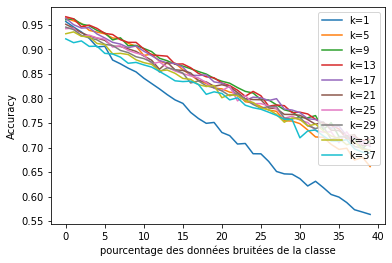

In [29]:
# Pour Iris
alpha = range(40)
Neighbors = range(1,40, 4)
l_neighbor = []
for k in Neighbors:
    l = []
    for a in alpha:
        m = []
        for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
            y_noise_iris = bruit_etiquette_iris(Y_iris, a)
            x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(x_train, y_train)
            accuracy = knn.score(x_test, y_test)
            m.append(accuracy)
        l.append(np.mean(m))
    plt.plot(alpha, l, label = f"k={k}")
    l_neighbor.append((k, l))
plt.legend(loc='upper right')
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")

In [30]:
# Affichage de la variance pour chaque k
list_k = [l_neighbor[i][0] for i in range(len(l_neighbor))]
list_accuracy = [l_neighbor[i][1] for i in range(len(l_neighbor))]
list_variance = []
for accuracy in list_accuracy:
    list_variance.append(Stabilite(accuracy))

Text(0, 0.5, "Variance de l'accuracy")

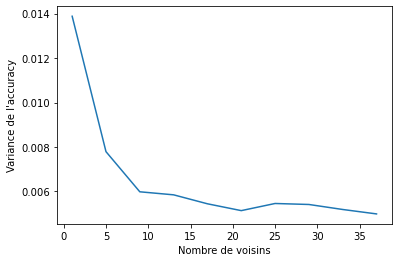

In [31]:
plt.plot(list_k, list_variance)
plt.xlabel('Nombre de voisins')
plt.ylabel("Variance de l'accuracy")

# Réseaux de Neurones

In [ ]:
# Sans bruit

In [32]:
# Normalisation des données :
from sklearn.preprocessing import normalize
X = normalize(X_iris)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_iris, test_size=0.2, shuffle = True)

In [34]:
# Encodage one-hot
from tensorflow.keras.utils import to_categorical
nb_classes = 3
y_train =  to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

Init Plugin
Init Graph Optimizer
Init Kernel


In [35]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
model = Sequential()
#from tensorflow.keras.layers import Dense, 
#Optimizer
optimizer = Adam(lr=0.001)
# Model
model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
None


2022-08-14 13:33:59.079333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 13:33:59.079716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/mohammedkhatbane/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [36]:
model.fit(x_train, y_train, verbose=0, batch_size=5, epochs=40)
results = model.evaluate(x_test, y_test)

2022-08-14 13:34:06.532914: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-14 13:34:06.535580: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-14 13:34:06.666638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 130ms/step - loss: 0.2473 - accuracy: 0.9667


2022-08-14 13:34:11.051226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [37]:
print("accuracy =", results[1])

accuracy = 0.9666666984558105


# Simulation 20 fois pour Réseau de Neurone

In [38]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize
from tensorflow.keras.utils import to_categorical
nb_classes = 3
model = Sequential()
X = normalize(X_iris) # normalisation
alpha = list(range(20))
l_NN = [] # liste pour récupérer les accuracy
# optimizer
optimizer = Adam(lr=0.001)
for a in alpha:
    # ------------ Iris ------------
    y_noise_iris = bruit_etiquette_iris(Y_iris, a)
    x_train, x_test, y_train, y_test = train_test_split(X, y_noise_iris, test_size=0.3)
    y_train =  to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    # Model
    model.add(Dense(10,input_shape=(4,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, verbose=0, batch_size=5, epochs=40)
    results = model.evaluate(x_test, y_test)
    accuracy = results[1]
    l_NN.append(accuracy)

/Users/mohammedkhatbane/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-08-14 13:34:33.406612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 10ms/step - loss: 0.4703 - accuracy: 0.8000


2022-08-14 13:34:36.963646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:34:37.146263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 14ms/step - loss: 0.2520 - accuracy: 0.9333


2022-08-14 13:34:42.553270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:34:42.778835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step - loss: 0.5050 - accuracy: 0.9111


2022-08-14 13:34:49.763602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:34:50.037197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step - loss: 0.2913 - accuracy: 0.9556


2022-08-14 13:34:58.694752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:34:59.015844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step - loss: 0.7149 - accuracy: 0.6444


2022-08-14 13:35:09.077964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:35:09.455190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 30ms/step - loss: 0.5287 - accuracy: 0.6000


2022-08-14 13:35:21.042483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:35:21.525081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 35ms/step - loss: 0.6070 - accuracy: 0.5556


2022-08-14 13:35:34.354457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:35:34.795865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 41ms/step - loss: 0.6145 - accuracy: 0.6000


2022-08-14 13:35:49.551184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:35:50.049030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.6536 - accuracy: 0.6250

2022-08-14 13:36:06.994927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 75ms/step - loss: 0.6925 - accuracy: 0.6667


2022-08-14 13:36:07.650540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 47ms/step - loss: 0.6235 - accuracy: 0.6444


2022-08-14 13:36:25.804854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:36:26.510860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 56ms/step - loss: 0.7543 - accuracy: 0.5556


2022-08-14 13:36:45.896563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:36:46.514859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 56ms/step - loss: 0.7060 - accuracy: 0.6444


2022-08-14 13:37:07.453439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:37:08.113846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 60ms/step - loss: 0.8642 - accuracy: 0.5556


2022-08-14 13:37:30.820691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:37:31.518344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.9951 - accuracy: 0.5625

2022-08-14 13:37:55.276280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 69ms/step - loss: 1.0277 - accuracy: 0.5778


2022-08-14 13:37:56.070716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.8172 - accuracy: 0.5625

2022-08-14 13:38:22.254327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 67ms/step - loss: 0.7815 - accuracy: 0.6000


2022-08-14 13:38:23.213819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.8232 - accuracy: 0.6250

2022-08-14 13:38:50.149871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 78ms/step - loss: 0.8510 - accuracy: 0.5778


2022-08-14 13:38:51.023305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.7735 - accuracy: 0.5000

2022-08-14 13:39:19.931728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 78ms/step - loss: 0.8599 - accuracy: 0.5111


2022-08-14 13:39:20.872796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.8585 - accuracy: 0.7188

2022-08-14 13:39:50.769805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 90ms/step - loss: 0.8223 - accuracy: 0.6667


2022-08-14 13:39:51.746206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 0.8379 - accuracy: 0.5000

2022-08-14 13:40:26.193039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 83ms/step - loss: 0.8201 - accuracy: 0.5333


2022-08-14 13:40:27.528140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:41:02.537894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 89ms/step - loss: 0.7004 - accuracy: 0.6000


Text(0, 0.5, 'accuracy')

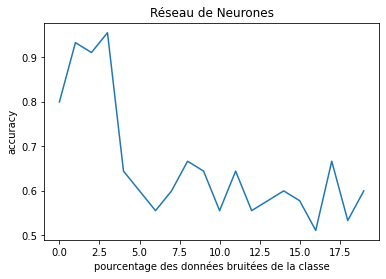

In [39]:
plt.plot(range(20), l_NN)
plt.title("Réseau de Neurones")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("accuracy")

# Feature Noise

In [40]:
# On recharge les données 
import sklearn.datasets as d
df = d.load_iris()
x = df.data
y = df.target
# On mélange le jeu de données :
X, Y = shuffle(x, y)

On va prendre la première variable (première colonne) d'Iris. Et on va la bruiter de la même façon que ce qu'on a fait précédemment. Voici notre approche :
On prend le min et le max de la variable, ensuite selon une proportion $\alpha$ on modifie aléatoirement la variable en générant aléatoirement des valeurs entre le min et le max. Finalement on voit l'impact de ces erreurs sur l'accuracy.

In [41]:
# Avec la loi uniforme
from copy import deepcopy
def bruit_variable(X, alpha):
    """Cette fonction prend
    - alpha : proportion des exemples à bruiter
    - x : une variable du jeu de donnée
    et retourne la variable bruitée
    """
    x = deepcopy(X)
    n = int(alpha*150/100) # nombre des exemples à buiter
    indices = random.sample(range(0,150), n) # indices de n éléments du dataset aléatoires
    if len(indices)>0:
        for i in indices: 
            x[i]= random.uniform(min(X),max(X)) # on affecte à chacun des indices qui ont été généré aléatoirement 
                                        # une étiquette aléatoire également
    return x

On va à présent simuler des valeurs d'une variable à l'aide de la loi expo. Pour générer un réel aléatoire dans l'intervalle $[a,b]$ on procède comme ceci :
1. Générer un réel x selon la loi expo
2. $\theta = \frac{x}{x+1}$
3. Donc on a $a\theta +(1-\theta)b \in [a,b]$ <br>
NB : Rappelons que les valeurs de toutes les variables d'iris sont positives.

In [42]:
#avec la loi exponentielle
def bruit_variable_expo(X, alpha):
    x = deepcopy(X)
    n = int(alpha*150/100) # nombre des exemples à buiter
    indices = random.sample(range(0,150), n) # indices de n éléments du dataset aléatoires
    if len(indices)>0:
        for i in indices:
            t = random.expovariate(2) # génération d'un réel selon expo de paramètre 2
            theta = t/(t+1)
            x[i] = min(X)*theta + max(X)*(1-theta)
    return x

# DecisionTree & Feature Noise

In [43]:
l1_iris_variable = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable(x[:,0], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l1_iris_variable.append(np.mean(m_iris))

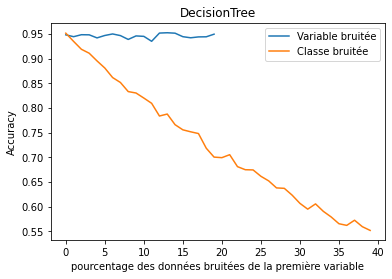

In [46]:
plt.plot(range(len(l1_iris_variable)), l1_iris_variable, label = 'Variable bruitée') # feature noise
plt.plot(range(len(l1_iris)), l1_iris, label = 'Classe bruitée') # label noise
plt.title("DecisionTree")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")
plt.legend()

In [47]:
# Comparaison entre l'uniforme et l'expo dans le cas de DecisionTree
alpha = range(40)
#-------Uniforme--------
l_uniforme = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable(x[:,0], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_uniforme.append(np.mean(m_iris))
#-------expo--------
l_expo = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable_expo(x[:,0], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_expo.append(np.mean(m_iris))

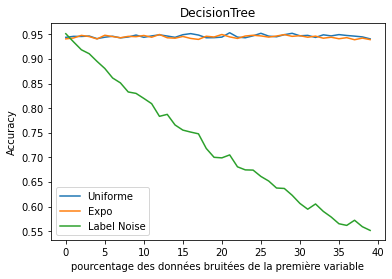

In [48]:
plt.plot(alpha, l_uniforme, label = 'Uniforme') # feature noise
plt.plot(alpha, l_expo, label = 'Expo') # label noise
plt.plot(alpha, l1_iris, label = 'Label Noise')
plt.title("DecisionTree")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")
plt.legend()

Que se passe-t-il si on introduit des erreurs dans 3 variables d'iris ?

In [49]:
# Comparaison entre l'uniforme et l'expo dans le cas de DecisionTree
alpha = range(40)
#-------Uniforme--------
l_uniforme_2v = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable(x[:,0], a) # première variable
        x[:,1] = bruit_variable(x[:,1], a) # deuxième variable
        x[:,2] = bruit_variable(x[:,2], a) # troisième variable
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_uniforme_2v.append(np.mean(m_iris))
#-------expo--------
l_expo_2v = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable_expo(x[:,0], a)
        x[:,1] = bruit_variable_expo(x[:,1], a)
        x[:,2] = bruit_variable_expo(x[:,2], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_expo_2v.append(np.mean(m_iris))

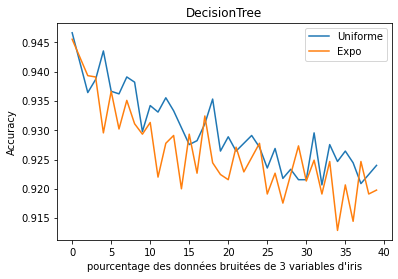

In [50]:
plt.plot(alpha, l_uniforme_2v, label = 'Uniforme') # feature noise
plt.plot(alpha, l_expo_2v, label = 'Expo') # label noise
#plt.plot(alpha, l1_iris, label = 'Label Noise')
plt.title("DecisionTree")
plt.xlabel("pourcentage des données bruitées de 3 variables d'iris")
plt.ylabel("Accuracy")
plt.legend()

# RandomForest & Feature Noise

In [51]:
l2_iris_variable = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable(x[:,0], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        rf = RandomForestClassifier()
        rf.fit(x_train, y_train)
        accuracy = rf.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l2_iris_variable.append(np.mean(m_iris))

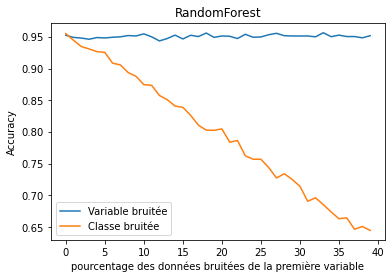

In [52]:
plt.plot(alpha, l2_iris_variable, label = 'Variable bruitée') # feature noise
plt.plot(alpha, l2_iris, label = 'Classe bruitée') # label noise
plt.title("RandomForest")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")
plt.legend()

# KNeighborsClassifier & Feature Noise

In [53]:
# KneighborsClassifier & Feature Noise
l3_iris_variable = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        x = deepcopy(X)
        x[:,0] = bruit_variable(x[:,0], a)
        x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
        knn = KNeighborsClassifier()
        knn.fit(x_train, y_train)
        accuracy = knn.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l3_iris_variable.append(np.mean(m_iris))

Text(0, 0.5, 'Accuracy')

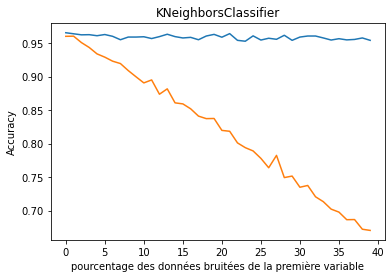

In [54]:
plt.plot(alpha, l3_iris_variable)
plt.plot(alpha, l3_iris)
plt.title("KNeighborsClassifier")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")

# GaussianNB & Feature Noise

In [55]:
#GaussianNB & Feature Noise
l4 = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
alpha = list(range(41)) # liste de 0% à 40%
for a in alpha:
    x = deepcopy(X)
    x[:,0] = bruit_variable(x[:,0], a)
    x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    accuracy = gnb.score(x_test, y_test)
    l4.append(accuracy)

Text(0, 0.5, 'Accuracy')

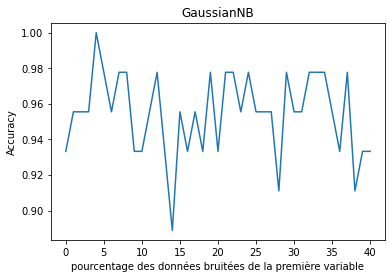

In [56]:
plt.plot(alpha, l4)
plt.title("GaussianNB")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")

# SVM & Feature Noise

Text(0, 0.5, 'Accuracy')

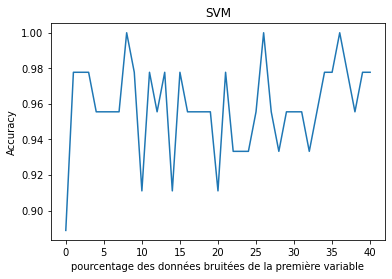

In [57]:
# SVM et Feature Noise
from sklearn import svm
l5 = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
alpha = list(range(41)) # liste de 0% à 40%
for a in alpha:
    x = deepcopy(X)
    x[:,0] = bruit_variable(x[:,0], a)
    x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)
    l5.append(accuracy)
plt.plot(alpha, l5)
plt.title("SVM")
plt.xlabel("pourcentage des données bruitées de la première variable")
plt.ylabel("Accuracy")

# Méthodes ensembliste : Bagging VS Boosting

## Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier
l_bagging_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l_bagging_titanic = []
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        clf = BaggingClassifier(base_estimator= None, n_estimators=100, random_state=0)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_bagging_iris.append(np.mean(m_iris))
    l_bagging_titanic.append(np.mean(m_titanic))

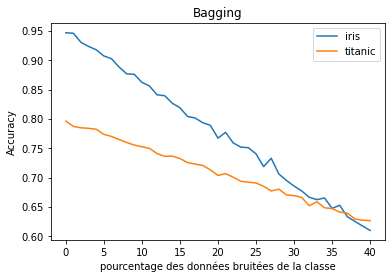

In [60]:
plt.plot(alpha, l_bagging_iris, label = 'iris')
plt.plot(alpha, l_bagging_titanic, label = 'titanic')
plt.title("Bagging")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

## Boosting 

In [61]:
from sklearn.ensemble import AdaBoostClassifier
l_boosting_iris = [] # liste vide dans laquelle on va stocker l'accuracy pour chaque alpha
l_boosting_titanic = []
# Pour Iris
for a in alpha:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 5 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, a)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=0.3)
        clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_iris.append(accuracy)
        # ------------ titanic ----------
        y_noise_titanic = bruit_etiquette_titanic(Y_titanic, a)
        x_train, x_test, y_train, y_test = train_test_split(X_titanic, y_noise_titanic, test_size=0.3)
        clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        m_titanic.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    l_boosting_iris.append(np.mean(m_iris))
    l_boosting_titanic.append(np.mean(m_titanic))

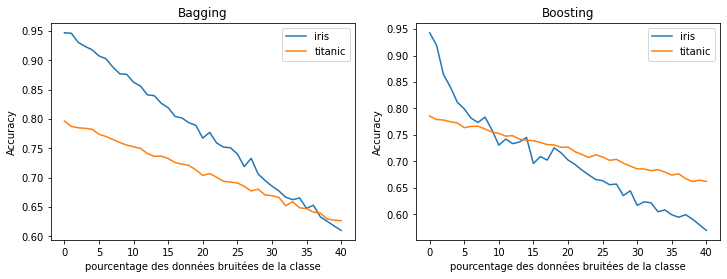

In [62]:
# Visualisation des courbes pour le Bagging et le boosting
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(alpha, l_bagging_iris, label = 'iris')
plt.plot(alpha, l_bagging_titanic, label = 'titanic')
plt.title("Bagging")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(alpha, l_boosting_iris, label = 'iris')
plt.plot(alpha, l_boosting_titanic, label = 'titanic')
plt.title("Boosting")
plt.xlabel("pourcentage des données bruitées de la classe")
plt.ylabel("Accuracy")
plt.legend()

In [63]:
# Variance Bagging et Boosting pour Iris
pd.DataFrame({
    "Model" : ['Bagging', 'Boosting'],
    "Variance" : [Stabilite(l_bagging_iris), Stabilite(l_boosting_iris)] 
})

,Model,Variance
0,Bagging,0.010247
1,Boosting,0.008112


In [64]:
# Variance Bagging et Boosting pour Titanic
pd.DataFrame({
    "Model" : ['Bagging', 'Boosting'],
    "Variance" : [Stabilite(l_bagging_titanic), Stabilite(l_boosting_titanic)] 
})

,Model,Variance
0,Bagging,0.002542
1,Boosting,0.001367


Le bagging est plus performant que le boosting en présence de label noise !

# Label Noise et le nombre nécessaire des exemples

## DecisionTree comme exemple :

In [65]:
import sklearn.datasets as d
df = d.load_iris()
x = df.data
y = df.target
# On mélange le jeu de données :
X, Y = shuffle(x, y)

Que se passe-t-il si on diminue la taille du training set ?

In [66]:
size = np.linspace(0.1,0.99,10) 

# Avec une classe bruitée à 30% :

In [67]:
accuracy_iris_bruit = []
# Pour Iris
for p in size:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        y_noise_iris = bruit_etiquette_iris(Y_iris, 30)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, y_noise_iris, test_size=p)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    accuracy_iris_bruit.append(np.mean(m_iris))

In [68]:
#sans bruit
accuracy_iris = []
# Pour Iris
for p in size:
    m_iris = [] # cette liste sert à stocker les accuracy pour 100 fois afin de faire la moyenne
            # à la fin pour chaque alpha
    m_titanic = [] # Pareil pour titanic
    for c in range(100):  # cette boucle sert à répéter la simulation du bruit 100 fois
        # ------------ Iris ------------
        #y_noise_iris = bruit_etiquette_iris(Y_iris, 30)
        x_train, x_test, y_train, y_test = train_test_split(X_iris, Y_iris, test_size=p)
        dtree = DecisionTreeClassifier()
        dtree.fit(x_train, y_train)
        accuracy = dtree.score(x_test, y_test)
        m_iris.append(accuracy)
    # là on a une liste m contenant pour un alpha 100 accuracy, on fait la moyenne et on l'ajoute à la liste l1
    accuracy_iris.append(np.mean(m_iris))

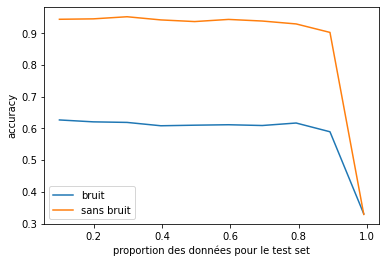

In [69]:
# Courbes
plt.plot(size, accuracy_iris_bruit, label = 'bruit')
plt.plot(size, accuracy_iris, label = 'sans bruit')
plt.ylabel('accuracy')
plt.xlabel('proportion des données pour le test set')
plt.legend()